# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import pathlib
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import image
from keras.utils.np_utils import to_categorical
import pickle

# Uploading Dataset

In [2]:
data_path =r'C:\Users\shaha\Desktop\dataset\training_data'
CATEGORIES = ['smoking','notsmoking'] 

In [3]:
training_data = []
IMG_SIZE=128

def trian_dataset():
    for category in CATEGORIES:
        path = os.path.join(data_path, category) # path to our data
        class_num = CATEGORIES.index(category)# classifcation index
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resizing our imgz
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
trian_dataset()

In [4]:
print(len(training_data))

2007


# Shuflle data

In [5]:
import random
random.shuffle(training_data)
train_data, labels_data = zip(*training_data)

In [6]:
for Sample in training_data[:10]:
    print(Sample[1])

1
0
1
0
0
1
0
0
0
0


In [7]:
X=[]
y=[]
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)# reshape
y = to_categorical(y, num_classes = 2)

In [9]:
X.shape,y.shape

((2007, 128, 128, 3), (2007, 2))

In [10]:
pickle.dump(X, open('X.pkl', 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))

In [10]:
def display_random_set(data, labels, classes):
    plt.figure(figsize=(15, 15))
    for i in range(10):
        plt.subplot(5, 5, (i+1))
        random_val = np.random.randint(low=0, high=len(data))
        img = data[random_val]
        plt.imshow(img)
        plt.axis(False)
        plt.title(classes[np.argmax(labels[random_val])])
    plt.show()

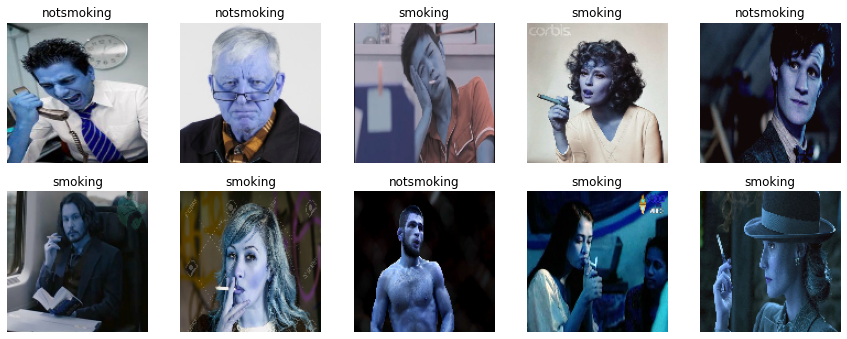

In [11]:
display_random_set(data=X, labels=y, classes=CATEGORIES)

# Split Data (Train - Validation)

In [12]:
nsample,nx,ny,ni=X.shape
X1=X.reshape(nsample,nx*ny*ni)
print(X1.shape)

(2007, 49152)


In [13]:
X_train, X_val, y_train, y_val= train_test_split(X1, y, test_size=.2, random_state=42)